## Part 1 — Linear Regression with One Feature

## Objetive
In this book you will see a model stellar luminosity as a function of stellar mass using linear regression with an explicit bias term: 

$$
\hat{L} = w * M + b.
$$

# Importing libraries 
For this part, first of all, you have to import the libraries that we are going to use in this notebook. We are going to use the following libraries:

- **pandas**: We are going to use this library for data manipulation and analysis.
- **numpy**: We are going to use this library for numerical computations.
- **matplotlib**: We are going to use this library for data visualization.

In [1]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Defining the Dataset
In this section, we will define the stellar mass and luminosity data that we'll use to train our linear regression model.

In [3]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

## 1. Visualize the Dataset
We plot the data points to visually see tha data that we put before like this:

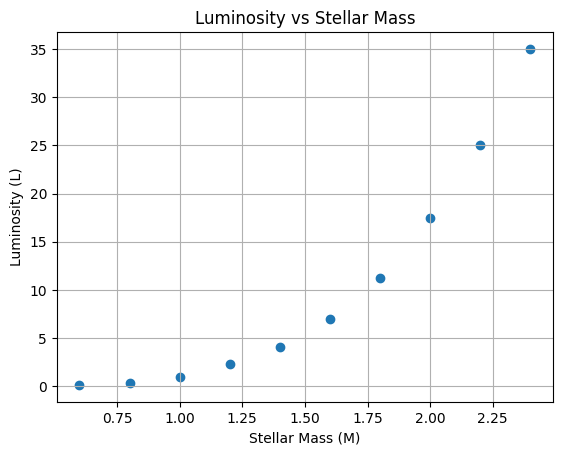

In [4]:
plt.scatter(M, L)
plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Luminosity vs Stellar Mass")
plt.grid(True)
plt.show()

As we can see from the graph that we made, there is a non-linear relationship between M and L. The relationship is non-linear, and it seems that the luminosity grows exponentially with respect to the masses. 

## 2. Model and Mean Squared Error (MSE)

We model the stellar luminosity as a linear function of stellar mass:

$$
\hat{L} = w * M + b
$$

where $w$ is the weight and $b$ is the bias.

And we use the Mean Squared Error (MSE):

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (\hat{L}_i - L_i)^2
$$

In [5]:
def predict(w, b, x):
    return w * x + b

In [6]:
def mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)

## 3. Cost Function Using MSE
We define a cost function based on the Mean Squared Error (MSE) to evaluate how well our linear regression model fits the data. The cost function is:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{L}_i - L_i)^2
$$


In [7]:
def compute_cost(w, b, X, y):
    y_hat = predict(w, b, X)
    return mse(y, y_hat) / 2

## 4. Cost surface

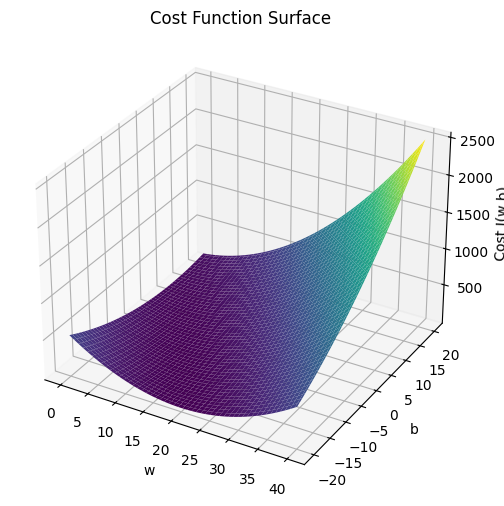

In [13]:
from mpl_toolkits.mplot3d import Axes3D

w_vals = np.linspace(0, 40, 100)
b_vals = np.linspace(-20, 20, 100)

J_vals = np.zeros((len(w_vals), len(b_vals)))
for i, w in enumerate(w_vals):
	for j, b in enumerate(b_vals):
		J_vals[i, j] = compute_cost(w, b, M, L)

W, B = np.meshgrid(w_vals, b_vals)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W, B, J_vals.T, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost J(w,b)')
ax.set_title('Cost Function Surface')

plt.show()

The 3D surface indicates that the cost function is a convex bowl. The minimum point represents the optimal parameters w and b. 

## 5. Gradients

To find the optimal parameters $w$ and $b$, we compute the gradients of the cost function with respect to each parameter:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{L}_i - L_i) \cdot M_i
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{L}_i - L_i)
$$

These gradients tell us the direction and magnitude of change needed to minimize the cost function.

In [18]:
def compute_gradients_loop(w, b, M, L):
    m = len(M)
    dw = 0.0
    db = 0.0
    
    for i in range(m):
        error = (w * M[i] + b) - L[i]
        dw += error * M[i]
        db += error

    dw /= m
    db /= m
    return dw, db

## 6. Vectorized Gradients

For efficiency, we compute gradients using vectorized operations instead of loops:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} (\hat{L} - L) \cdot M
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum (\hat{L} - L)
$$

This approach is faster and more efficient than the loop-based method.

In [ ]:
def compute_gradients_vectorized(w, b, M, L):
    m = len(M)
    errors = predict(w, b, M) - L
    dw = np.dot(errors, M) / m
    db = np.sum(errors) / m
    return dw, db


## 7. Gradient Descent Optimization

We now implement the gradient descent algorithm to find the optimal parameters $w$ and $b$ that minimize the cost function. Gradient descent iteratively updates the parameters using the computed gradients:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where $\alpha$ is the learning rate that controls the step size of each update.

In [ ]:
def gradient_descent_vectorized(M, L, alpha, epochs):
    w, b = 0.0, 0.0
    losses = []

    for _ in range(epochs):
        dw, db = compute_gradients_vectorized(w, b, M, L)
        w -= alpha * dw
        b -= alpha * db
        losses.append(mse(L, predict(w, b, M)))

    return w, b, losses


This plot shows how the loss (MSE) decreases over training iterations for different learning rates ($\alpha$). Each curve represents a different learning rate. A higher learning rate can lead to faster convergence, but if it's too high, it may cause instability. A lower learning rate results in slower but more stable convergence. This visualization helps us compare the effect of learning rate on the gradient descent optimization process.

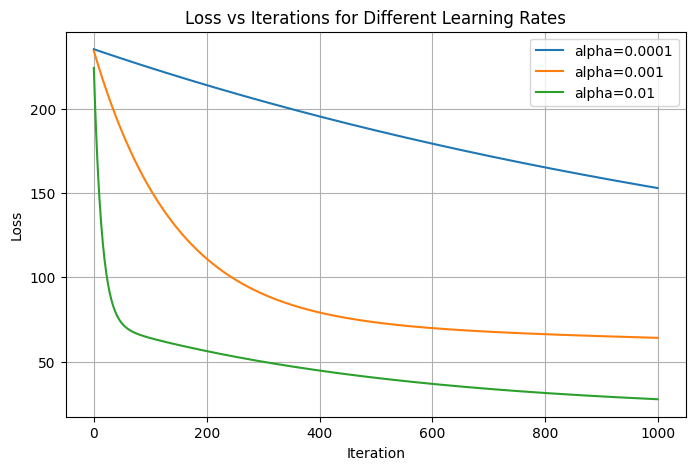

In [27]:
learning_rates = [0.0001, 0.001, 0.01]
epochs = 1000

plt.figure(figsize=(8,5))

for lr in learning_rates:
    w_tmp, b_tmp, losses_tmp = gradient_descent_vectorized(M, L, lr, epochs)
    plt.plot(losses_tmp, label=f'alpha={lr}')

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


Here the gradient descent finds the best fit to the linear model parameters ($w$, $b$) for predicting stellar luminosity from mass. It uses a learning rate of 0.01 and 5000 iterations. The final values of $w$, $b$, and the last loss (MSE) are printed, showing the result of the optimization:


In [34]:
alpha = 0.01
epochs = 5000

w_final, b_final, losses = gradient_descent_vectorized(M, L, alpha, epochs)

print("Final model parameters:")
print("w =", w_final)
print("b =", b_final)
print("Final loss =", losses[-1])


Final model parameters:
w = 18.022526963788536
b = -16.656882746208943
Final loss = 19.594416014567877


# 8. Convergency

As gradient descent iteratively updates the parameters $w$ and $b$, the cost decreases over time, eventually stabilizing near the optimal solution. The convergence behavior depends on the learning rate $\alpha$:

- **High learning rate**: Faster convergence but risk of overshooting the minimum
- **Low learning rate**: Slower convergence but more stable approach to the minimum
- **Optimal learning rate**: Balances speed and stability for efficient training

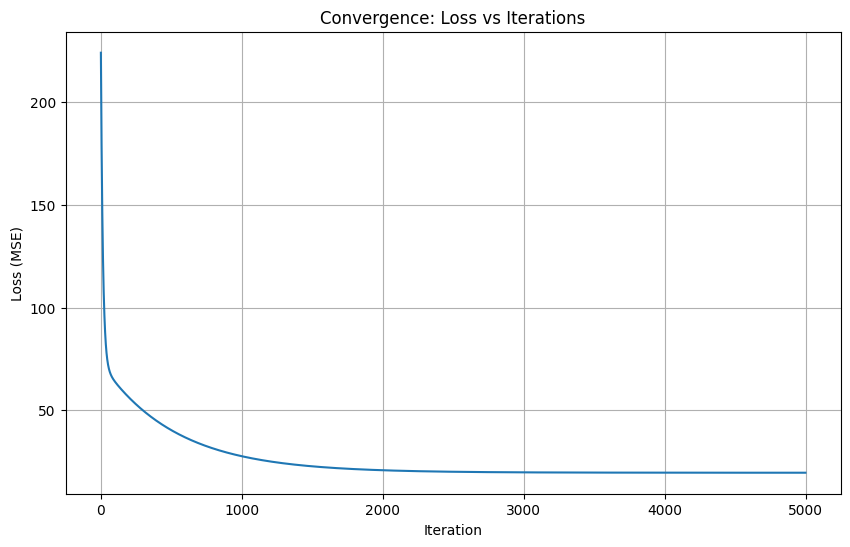

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Convergence: Loss vs Iterations")
plt.grid(True)
plt.show()

## 9. Final Linear Regression Model

The plot below shows the fitted linear model overlaid on the original data points. The red line represents our learned linear relationship between stellar mass and luminosity:

$$
\hat{L} = w \cdot M + b
$$

where $w \approx 18.02$ and $b \approx -16.66$. Notice how the linear model captures the general trend but underestimates the luminosity at higher masses, revealing the non-linear nature of the actual relationship.

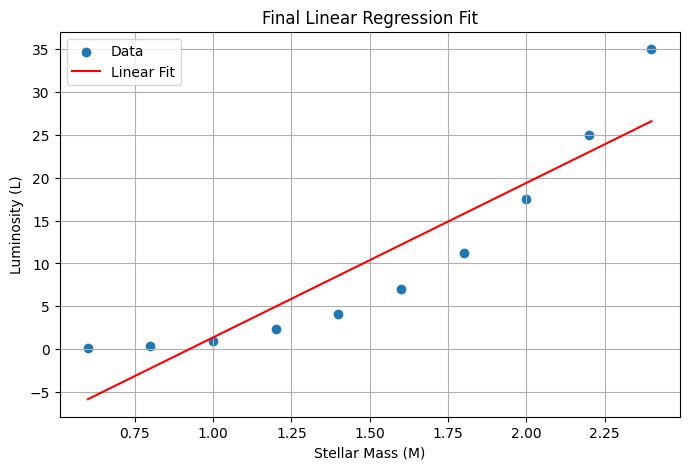

In [35]:
M_sorted = np.sort(M)
L_pred_sorted = predict(w_final, b_final, M_sorted)

plt.figure(figsize=(8,5))
plt.scatter(M, L, label="Data")
plt.plot(M_sorted, L_pred_sorted, color='red', label="Linear Fit")

plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Final Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


## 10. Conceptual Questions

- **Astrophysical meaning of w**: The slope $w$ represents the relationship between stellar mass and luminosity. This coefficient shows how much the luminosity increases per unit increase in stellar mass. The value $w \approx 18.02$ indicates that luminosity increases significantly with mass.

- **Why is a linear model limited here?**: Is limited because the actual relationship between stellar mass and luminosity is non-linear (approximately $L \propto M^{3.5}$). As shown in the scatter plot, luminosity grows exponentially with mass, especially at higher stellar masses. The linear fit underestimates luminosity for massive stars and overestimates it for low-mass stars, revealing that a polynomial graph and we see in the result and graphs that.